In [1]:
#Importporting libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import statsmodels.api as sm
from pandas.plotting import lag_plot

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
df_stocks = pd.read_csv("/Users/somashekarvayuvegula/Documents/Workspace/Applied_Data_Science/Week3/all_stocks_5yr.csv")

In [3]:
df_stocks.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [4]:
df_stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
#AAL dataset
df_aal = df_stocks.loc[df_stocks['Name'] == "AAL"]

In [6]:
df_aal.empty

False

In [7]:
df_aal.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [8]:
#UAL dataset
df_ual = df_stocks.loc[df_stocks['Name'] == "UAL"]

In [9]:
df_ual.head()

,date,open,high,low,close,volume,Name
556954,2013-02-08,25.90,26.44,25.7100,26.31,4648559,UAL
556955,2013-02-11,26.31,26.64,25.5900,26.51,4570710,UAL
556956,2013-02-12,26.29,26.48,25.6900,25.89,3925769,UAL
556957,2013-02-13,25.90,26.33,25.8805,26.19,4477848,UAL
556958,2013-02-14,26.11,26.19,25.2600,25.87,6112147,UAL


# Visualizations - AAL

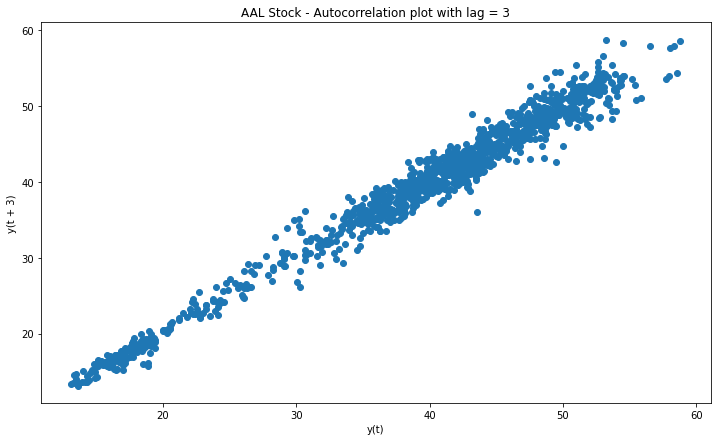

In [10]:
plt.figure(figsize=(12,7))
lag_plot(df_aal['open'], lag=3)
plt.title('AAL Stock - Autocorrelation plot with lag = 3')
plt.show()

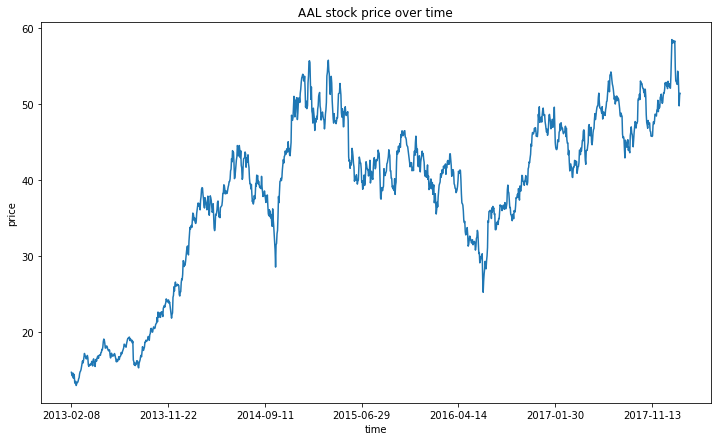

In [11]:
plt.figure(figsize=(12,7))
plt.plot(df_aal["date"], df_aal["close"])
plt.xticks(np.arange(0,1259, 200), df_aal['date'][0:1259:200])
plt.title("AAL stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

Text(0.5, 1.0, 'AAL Cumulative Returns')

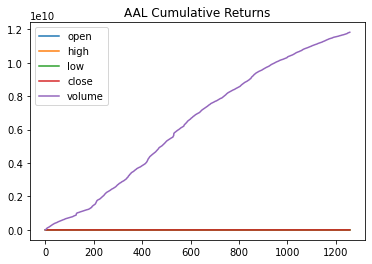

In [12]:
dr = df_aal.cumsum()
dr.plot()
plt.title('AAL Cumulative Returns')

# Visualizations - UAL

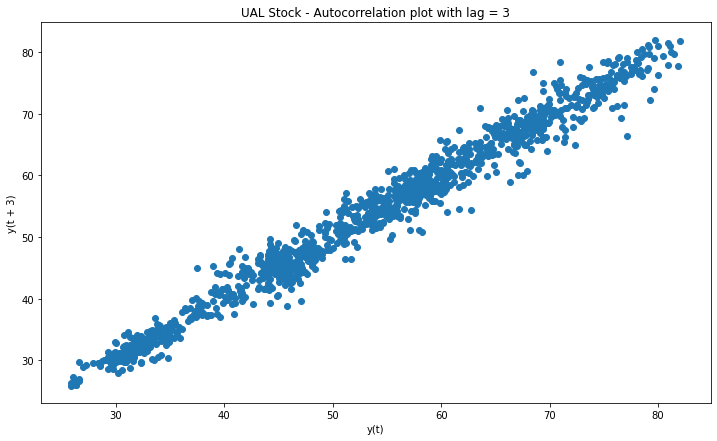

In [13]:
plt.figure(figsize=(12,7))
lag_plot(df_ual['open'], lag=3)
plt.title('UAL Stock - Autocorrelation plot with lag = 3')
plt.show()

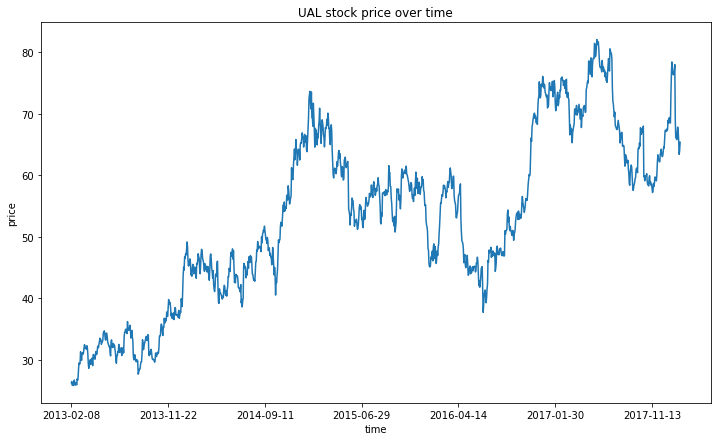

In [14]:
plt.figure(figsize=(12,7))
plt.plot(df_ual["date"], df_ual["close"])
plt.xticks(np.arange(0,1259, 200), df_ual['date'][0:1259:200])
plt.title("UAL stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

Text(0.5, 1.0, 'UAL Cumulative Returns')

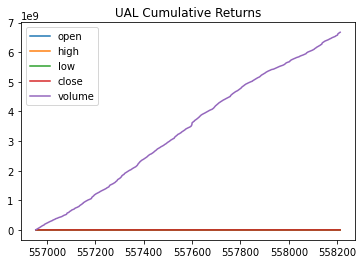

In [15]:
dr = df_ual.cumsum()
dr.plot()
plt.title('UAL Cumulative Returns')

# ARIMA Model Prediction - AAL

In [16]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [17]:
train_data, test_data = df_aal[0:int(len(df_aal)*0.7)], df_aal[int(len(df_aal)*0.7):]

train_data.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [18]:
train_ar = train_data['open'].values
test_ar = test_data['open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

# report performance
mse = round(mean_squared_error(test_ar, predictions),3)
print('MSE: '+str(mse))
mae = round(mean_absolute_error(test_ar, predictions),3)
print('MAE: '+str(mae))
rmse = round(math.sqrt(mean_squared_error(test_ar, predictions)),3)
print('RMSE: '+str(rmse))
mape = round(np.mean(np.abs(predictions - test_ar)/np.abs(test_ar)),3)
print('MAPE: '+str(mape))

accuracy = 100 - (mape*100)
print("Model Accuracy:" + str(accuracy) + "%")

<class 'list'>
MSE: 0.809
MAE: 0.656
RMSE: 0.9
MAPE: 0.014
Model Accuracy:98.6%


In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1646.542
Date:                Sun, 09 Apr 2023   AIC                           3305.083
Time:                        12:36:11   BIC                           3335.902
Sample:                             0   HQIC                          3316.666
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0262      0.022      1.198      0.231      -0.017       0.069
ar.L2          0.0015      0.026      0.059      0.953      -0.049       0.052
ar.L3          0.0391      0.027      1.476      0.140      -0.013       0.091
ar.L4         -0.0055      0.028     -0.195      0.846      -0.061       0.050
ar.L5         -0.0297      0.028     -1.058      0.290      -0.085       0.025
sigma2         0.8040      0.020     39.416      0.000       0.764       0.844
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               525.86
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

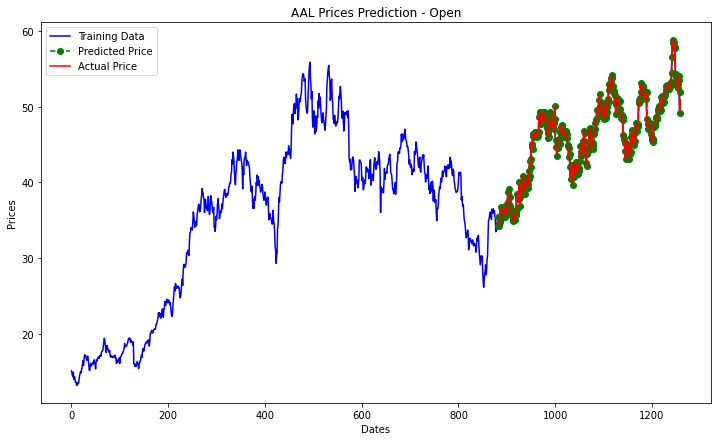

In [20]:
plt.figure(figsize=(12,7))
plt.plot(df_aal['open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price')
plt.title('AAL Prices Prediction - Open')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

# ARIMA Model Prediction - UAL

In [21]:
train_data, test_data = df_ual[0:int(len(df_ual)*0.7)], df_ual[int(len(df_ual)*0.7):]

train_ar = train_data['open'].values
test_ar = test_data['open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

# report performance
mse = round(mean_squared_error(test_ar, predictions),3)
print('MSE: '+str(mse))
mae = round(mean_absolute_error(test_ar, predictions),3)
print('MAE: '+str(mae))
rmse = round(math.sqrt(mean_squared_error(test_ar, predictions)),3)
print('RMSE: '+str(rmse))
mape = round(np.mean(np.abs(predictions - test_ar)/np.abs(test_ar)),3)
print('MAPE: '+str(mape))

accuracy = 100 - (mape*100)
print("Model Accuracy:" + str(accuracy) + "%")

<class 'list'>
MSE: 1.647
MAE: 0.93
RMSE: 1.283
MAPE: 0.014
Model Accuracy:98.6%


In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2039.174
Date:                Sun, 09 Apr 2023   AIC                           4090.348
Time:                        12:36:37   BIC                           4121.167
Sample:                             0   HQIC                          4101.931
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0160      0.024      0.667      0.505      -0.031       0.063
ar.L2          0.0176      0.026      0.687      0.492      -0.033       0.068
ar.L3         -0.0212      0.027     -0.802      0.423      -0.073       0.031
ar.L4         -0.0235      0.027     -0.863      0.388      -0.077       0.030
ar.L5          0.0060      0.029      0.211      0.833      -0.050       0.062
sigma2         1.5017      0.041     36.356      0.000       1.421       1.583
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               296.07
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

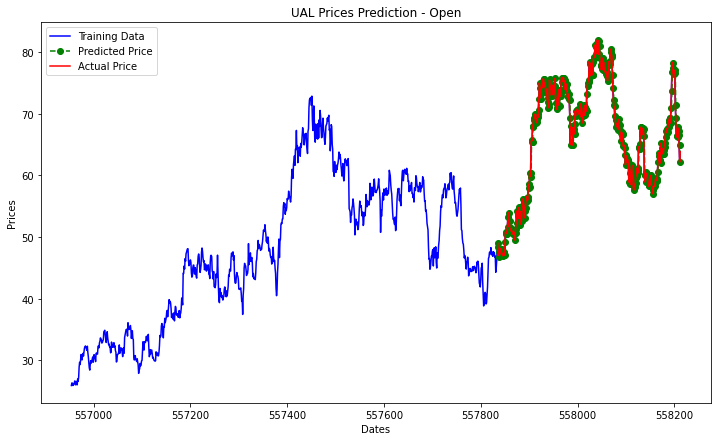

In [23]:
plt.figure(figsize=(12,7))
plt.plot(df_ual['open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price')
plt.title('UAL Prices Prediction - Open')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

# Implementation to include the Stcok indicator as input

In [24]:
def predict_stock(name):
    df_stocks = pd.read_csv("/Users/somashekarvayuvegula/Documents/Workspace/Applied_Data_Science/Week3/all_stocks_5yr.csv")
    df_stocks.isnull().sum()
    df_stocks.head()
    
    
    #fetch dataset for symbol provided
    df_stock = df_stocks.loc[df_stocks['Name'] == name]
    df_stock.head()
    
     #Check if the dataframe is empty
    if not df_stock.empty:
        #Visualizations
    
        plt.figure(figsize=(12,7))
        lag_plot(df_aal['open'], lag=3)
        plt.title(name + ' Stock - Autocorrelation plot with lag = 3')
        plt.show()


        plt.figure(figsize=(12,7))
        plt.plot(df_aal["date"], df_aal["close"])
        plt.xticks(np.arange(0,1259, 200), df_aal['date'][0:1259:200])
        plt.title(name + " stock price over time")
        plt.xlabel("time")
        plt.ylabel("price")
        plt.show()

        dr = df_aal.cumsum()
        dr.plot()
        plt.title(name+ 'Cumulative Returns')

        #ARIMA Model prediction

        def smape_kun(y_true, y_pred):
            return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))


        train_data, test_data = df_aal[0:int(len(df_aal)*0.7)], df_aal[int(len(df_aal)*0.7):]

        train_ar = train_data['open'].values
        test_ar = test_data['open'].values

        history = [x for x in train_ar]
        print(type(history))
        predictions = list()
        for t in range(len(test_ar)):
            model = ARIMA(history, order=(5,1,0))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test_ar[t]
            history.append(obs)
        
        # report performance
        mse = round(mean_squared_error(test_ar, predictions),3)
        print('MSE: '+str(mse))
        mae = round(mean_absolute_error(test_ar, predictions),3)
        print('MAE: '+str(mae))
        rmse = round(math.sqrt(mean_squared_error(test_ar, predictions)),3)
        print('RMSE: '+str(rmse))
        mape = round(np.mean(np.abs(predictions - test_ar)/np.abs(test_ar)),3)
        print('MAPE: '+str(mape))

        accuracy = 100 - (mape*100)
        print("Model Accuracy:" + str(accuracy) + "%")

        model_fit.summary()

        #Graph to shoe prediction
        plt.figure(figsize=(12,7))
        plt.plot(df_aal['open'], 'green', color='blue', label='Training Data')
        plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
             label='Predicted Price')
        plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price')
        plt.title(name+' Prices Prediction - Open')
        plt.xlabel('Dates')
        plt.ylabel('Prices')
        plt.legend()
    else:
        print("Stock Symbol is not valid or we don't have data. Please provide a valid Symbol.")

In [25]:
def main():
    lookup = True
    while lookup:
        name = input ("Enter Stock symbol for which prediction is requested for:")
    
        predict_stock(name)
    
        lookup = input("\n\nWould you like to perform another stock lookup? (Y/N): ")
        if lookup.lower() == 'n':
            break

Enter Stock symbol for which prediction is requested for:ABC


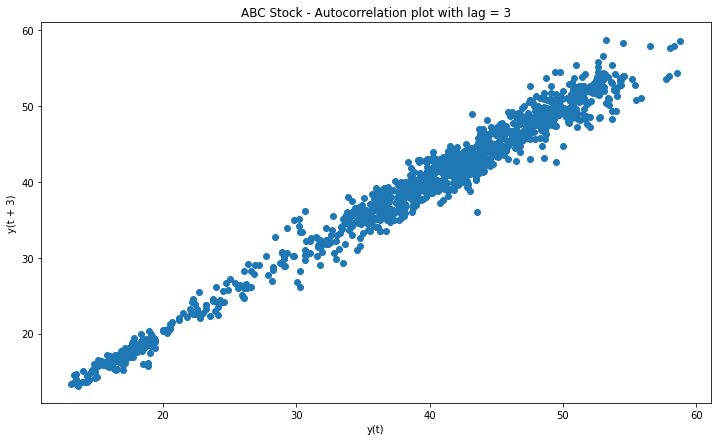

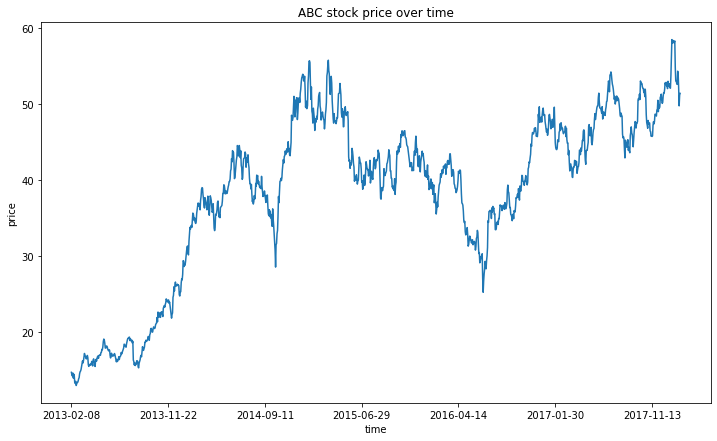

<class 'list'>
MSE: 0.809
MAE: 0.656
RMSE: 0.9
MAPE: 0.014
Model Accuracy:98.6%


Would you like to perform another stock lookup? (Y/N): Y
Enter Stock symbol for which prediction is requested for:CMS


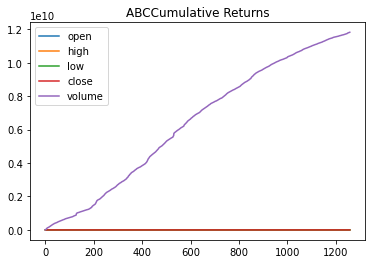

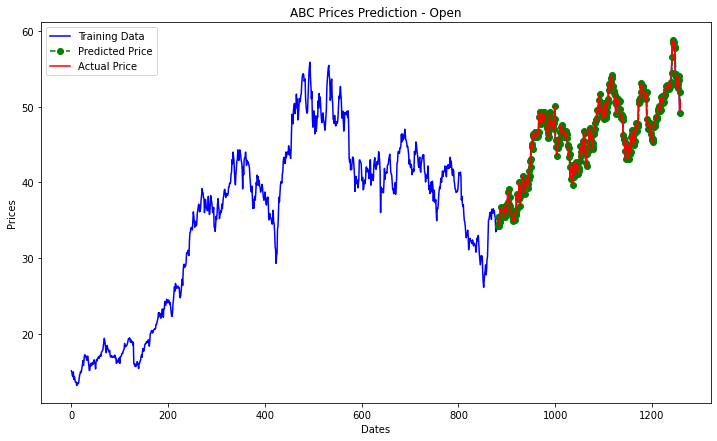

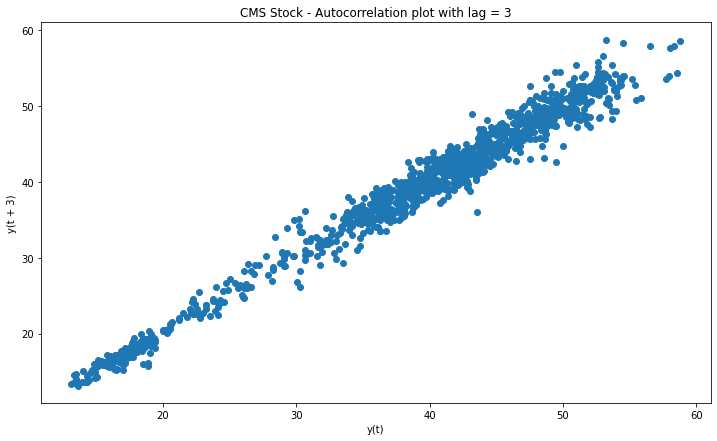

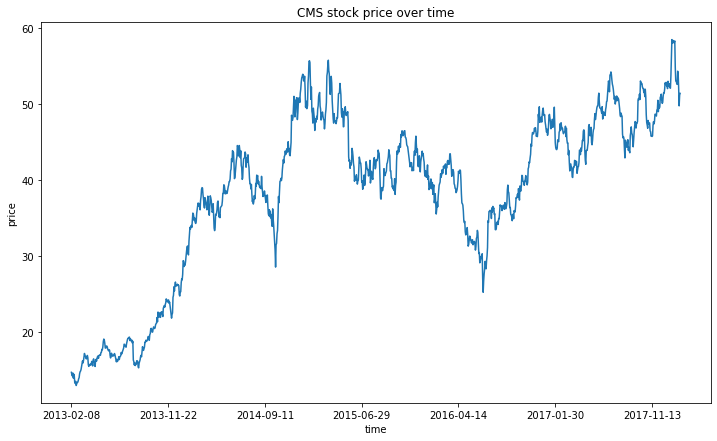

<class 'list'>
MSE: 0.809
MAE: 0.656
RMSE: 0.9
MAPE: 0.014
Model Accuracy:98.6%


Would you like to perform another stock lookup? (Y/N): Y
Enter Stock symbol for which prediction is requested for:XYZ
Stock Symbol is not valid or we don't have data. Please provide a valid Symbol.


Would you like to perform another stock lookup? (Y/N): N


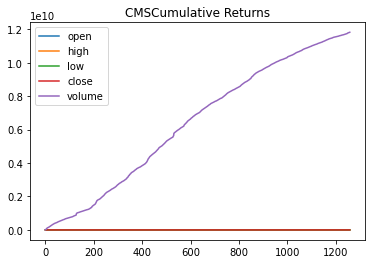

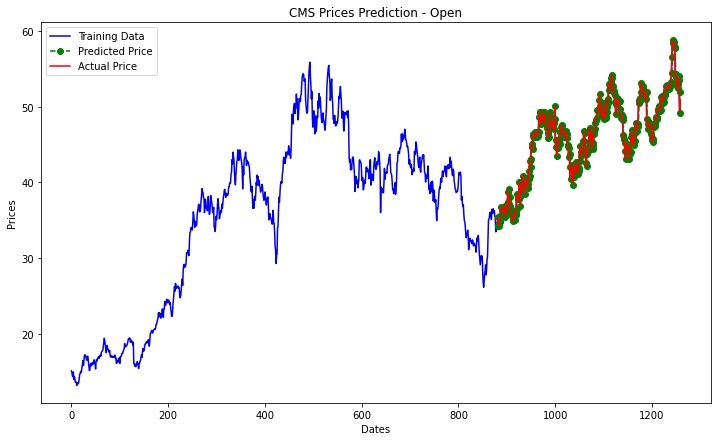

In [26]:
if __name__ == "__main__":
    main()